# Métodos não supervisionados - K-Means

Você tem em mãos dados de perfis de clientes de cartão de crédito e para propor melhores formas de resolver os problemas e propor ofertas a eles, é interessante dividir os clientes em partes semelhante.

Para entender melhor o perfil de cada cliente, você deve fazer uma clusterização com o método [K-Means](https://minerandodados.com.br/entenda-o-algoritmo-k-means/) e dizer qual é o perfil médio de dos clientes de cada cluster.

Você pode ler informações sobre esse dataset nesse link do [Kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata).

Para fazer a análise, você precisa:
- Tratar os dados e observar as estatísticas descritivas e distribuições dos dados
- Tratar outliers caso necessário
- Fazer uma transformação para standarizar os dados
- Fazer o KMEANS e utilizar o método do cotovelo para definir o número de clusters
- Através de boxplots, entender quais os perfis dos clusters e tentar caracterizar os clusters


<h1>Descrição de cada Featurs</h1>
<ul>
    <li>BALANCE : Saldo que resta na conta para fazer compras de cartão de crédito</li>
    <li>BALANCE_FREQUENCY : Com que frequência o Saldo é atualizado, pontuação entre 0 e 1 (1 = atualizado com frequência, 0 = não atualizado com frequência)</li>
    <li>COMPRAS : Quantidade de compras feitas na conta</li>
    <li>ONEOFF_PURCHASES : Valor máximo de compra feito de uma só vez</li>
    <li>INSTALLMENTS_PURCHASES : Valor de compra feito em parcela</li>
    <li>CASH_ADVANCE : Dinheiro adiantado fornecido pelo usuário</li>
    <li>PURCHASES_FREQUENCY : Com que frequência as compras estão sendo feitas, pontuação entre 0 e 1 (1 = comprado com frequência, 0 = não comprado com frequência)</li>
    <li>ONEOFFPURCHASESFREQUENCY : Com que frequência as compras estão acontecendo de uma só vez (1 = compradas com frequência, 0 = não compradas com frequência) </li>
    <li>PURCHASESINSTALLMENTSFREQUENCY : com que frequência as compras parceladas estão sendo feitas (1 = feitas com frequência, 0 = não feitas com frequência)</li>
    <li>CASHADVANCEFREQUENCY : com que frequência as dinheiro adiantado sendo pago</li>
    <li>CASHADVANCETRX : Número de transações feitas com "Cash in Advanced"</li>
    <li>PURCHASES_TRX : Número de transações de compra feitas</li>
    <li>CREDIT_LIMIT : Limite de cartão de crédito para o usuário</li>
    <li>PAYMENTS : Valor do pagamento feito pelo usuário</li>
    <li>MINIMUM_PAYMENTS : Valor mínimo dos pagamentos feitos pelo usuário</li>
    <li>PRCFULLPAYMENT: Porcentagem do pagamento integral pago pelo usuário</li>
    <li>POSSIBILIDADE : Posse do serviço de cartão de crédito para o usuário</li>

</ul>

In [75]:
#aqui tem as bibliotecas que vamos utilizar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sns.set(rc={'figure.figsize':(11.7,8.27)}) # isso é pras figuras ficarem maiores

## 1) Importação dos dados

Aqui você deve exportar os dados do kaggle para o colab.

In [76]:
"""from google.colab import files
uploaded = files.upload()"""

'from google.colab import files\nuploaded = files.upload()'

In [77]:
import io
df = pd.read_csv('CC GENERAL.csv',index_col=0)

In [78]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [80]:
df.describe(
    
)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [81]:
for coluna in df.columns:
    print(coluna, df[coluna].isna().sum())

BALANCE 0
BALANCE_FREQUENCY 0
PURCHASES 0
ONEOFF_PURCHASES 0
INSTALLMENTS_PURCHASES 0
CASH_ADVANCE 0
PURCHASES_FREQUENCY 0
ONEOFF_PURCHASES_FREQUENCY 0
PURCHASES_INSTALLMENTS_FREQUENCY 0
CASH_ADVANCE_FREQUENCY 0
CASH_ADVANCE_TRX 0
PURCHASES_TRX 0
CREDIT_LIMIT 1
PAYMENTS 0
MINIMUM_PAYMENTS 313
PRC_FULL_PAYMENT 0
TENURE 0


In [82]:
# preencher com zero os valores isna() da coluna MINIMUM_PAYMENTS e CREDIT_LIMIT
df['MINIMUM_PAYMENTS'].fillna(0.00, inplace=True)
df['CREDIT_LIMIT'].fillna(0.00,inplace=True)

# Poderiamos DROPAR os NaN
# df.dropna(inplace=True)

In [83]:
colunas = df.columns
df_tratado = df[df.columns[df.isna().sum() == 0]]
df_tratado.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [84]:
df_tratado.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4493.947277,1733.143852,833.983453,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.922543,2895.063757,2335.989918,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [85]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


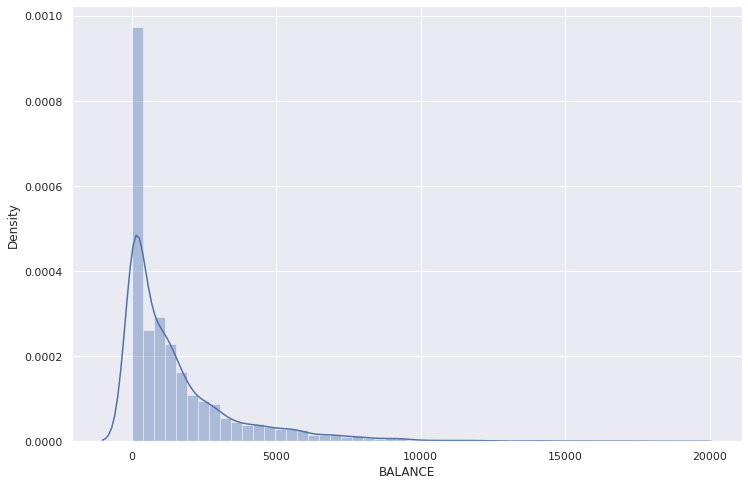

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


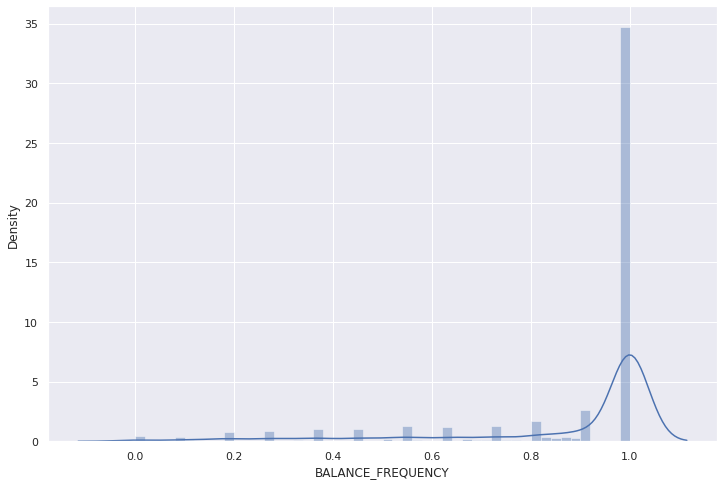

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


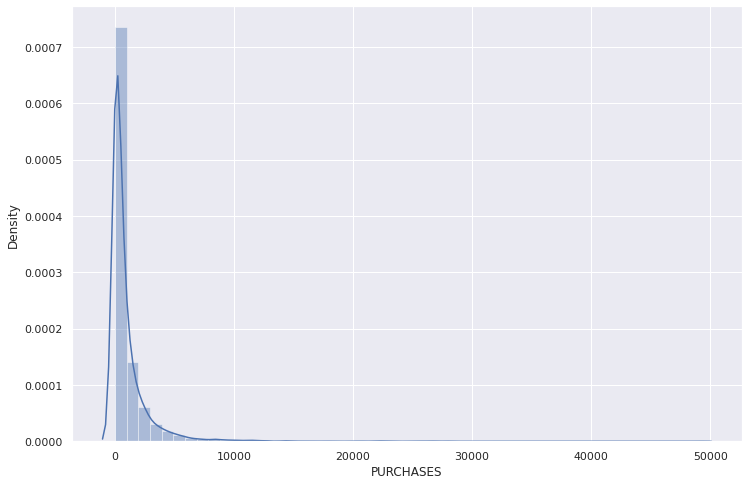

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


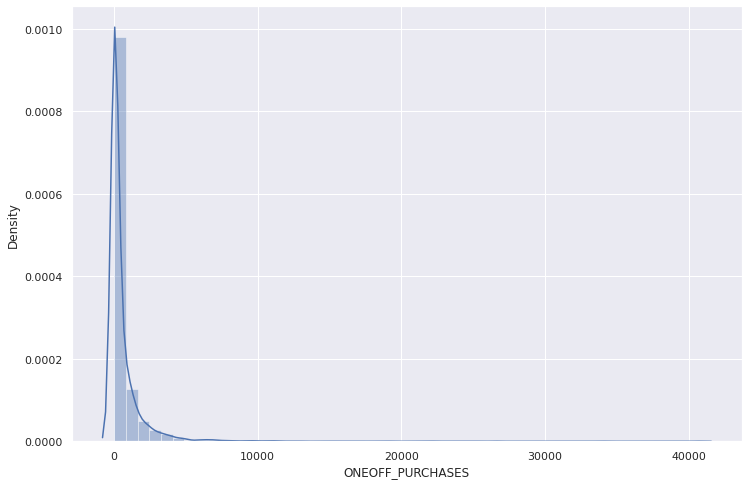

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


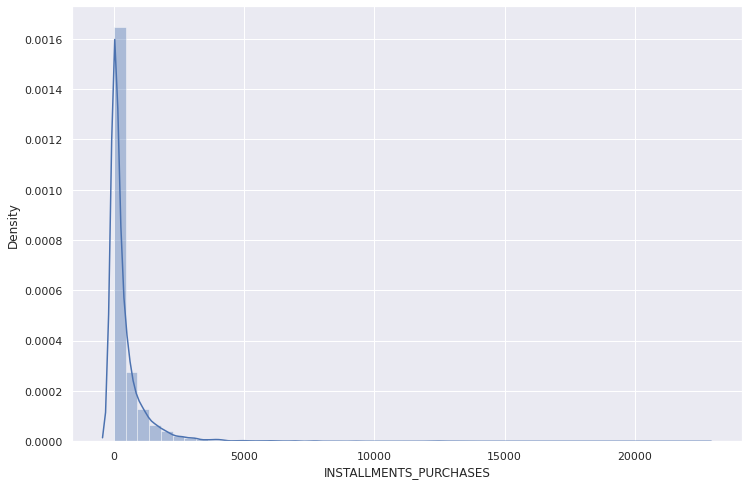

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


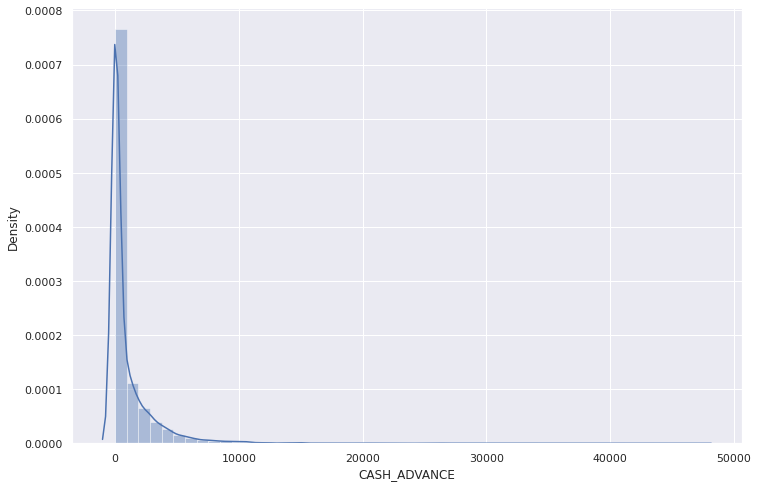

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


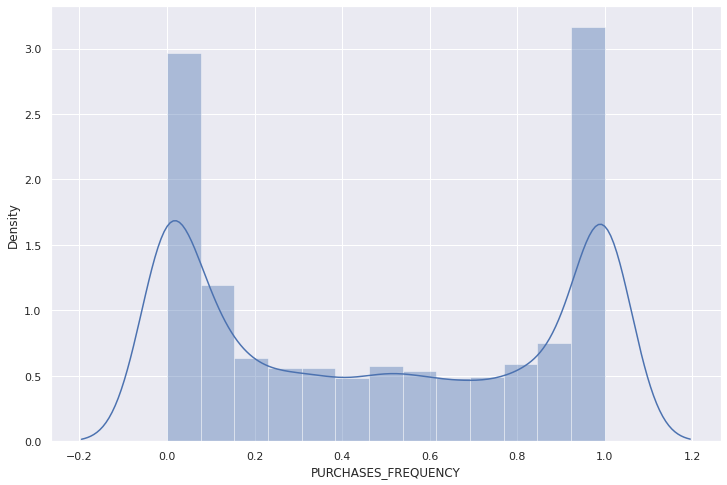

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


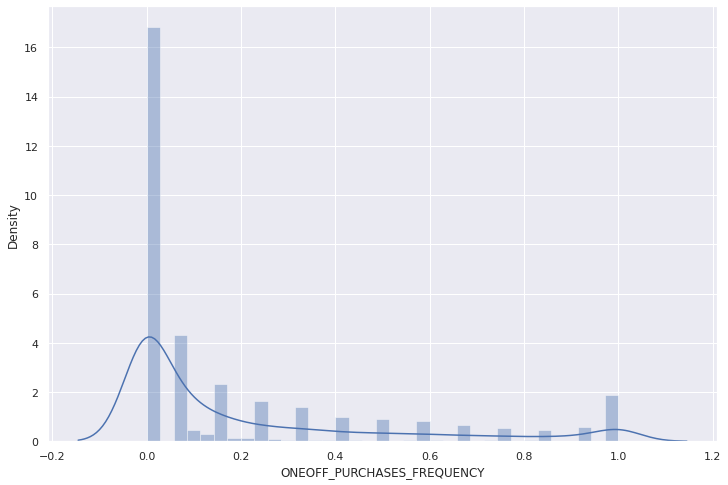

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


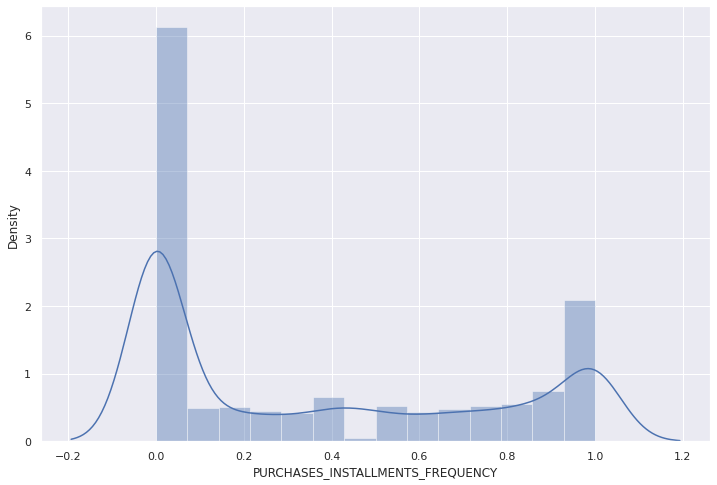

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


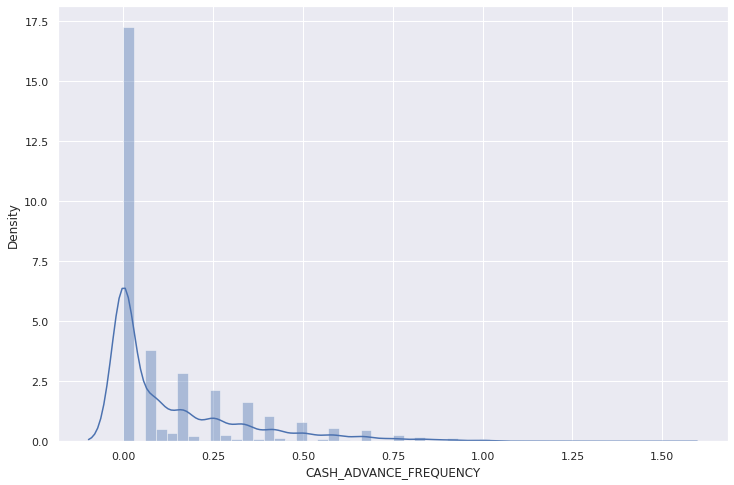

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


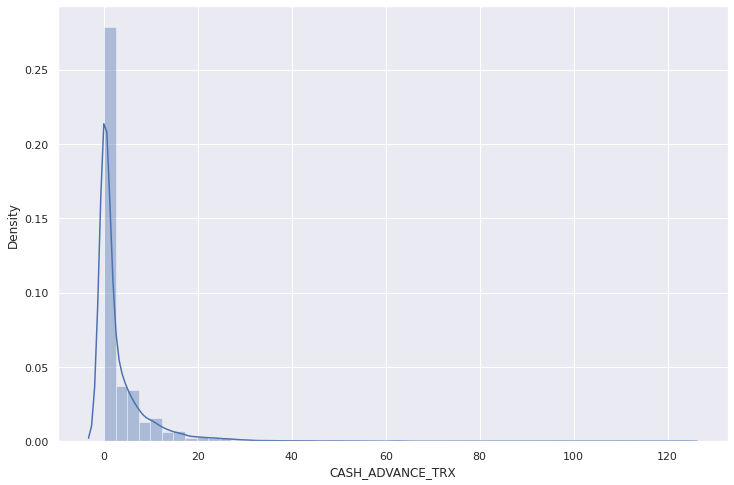

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


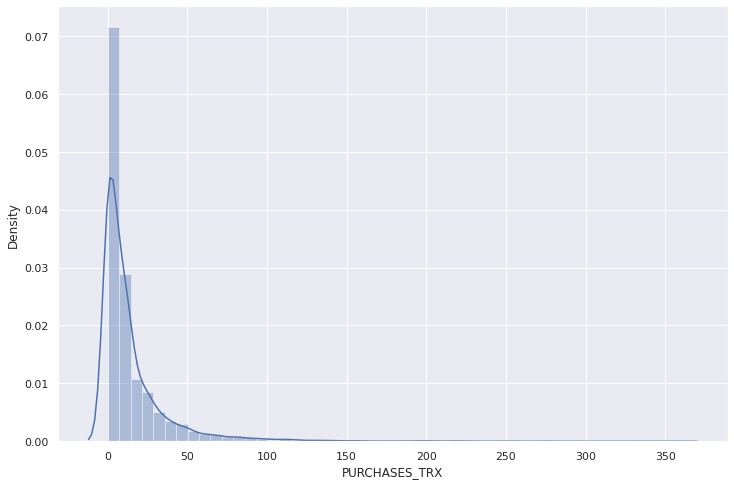

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


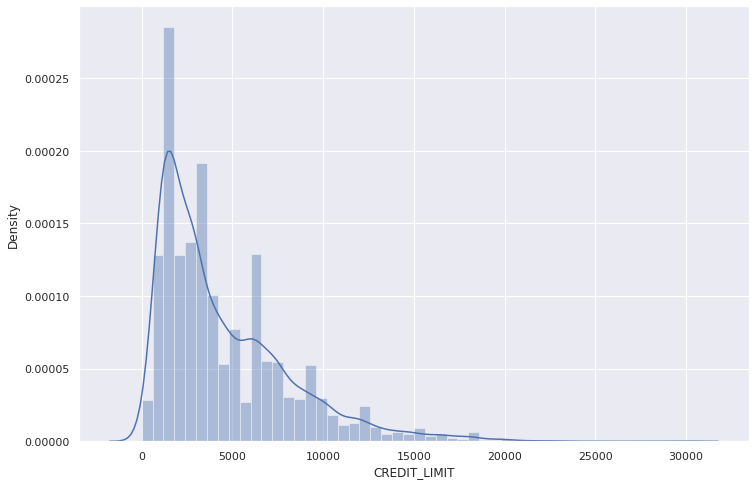

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


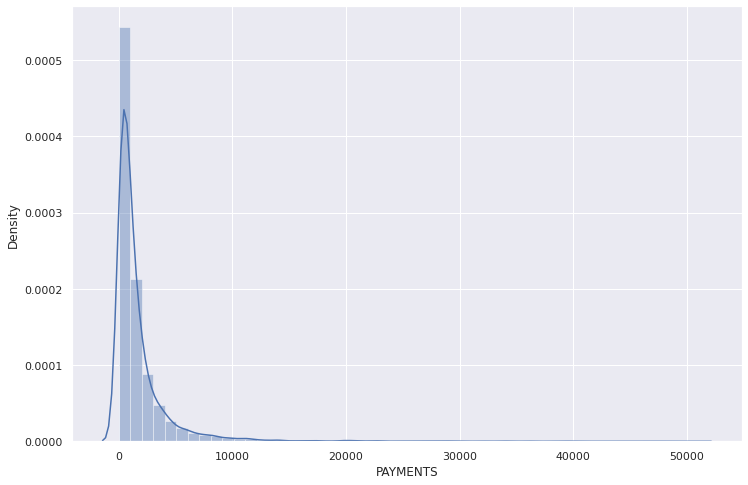

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


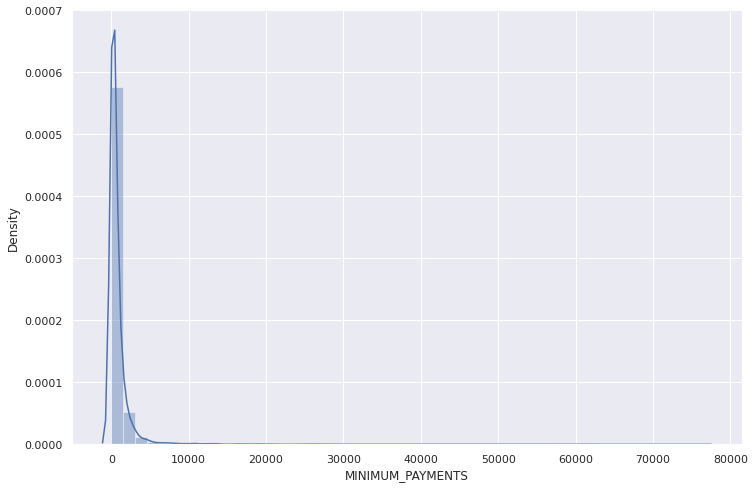

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


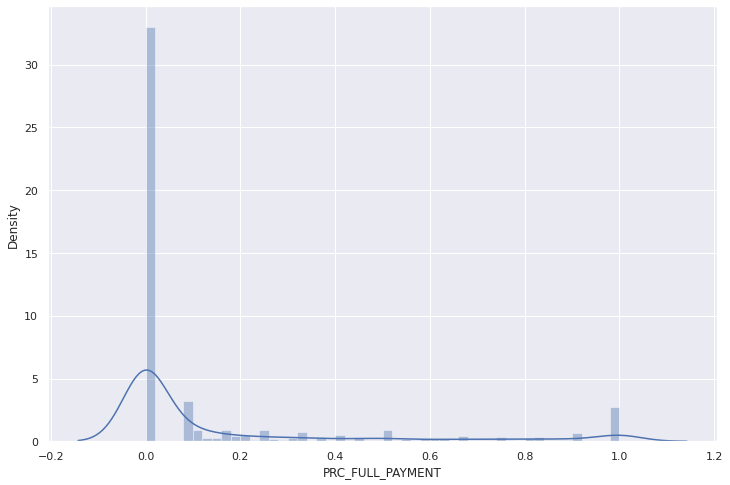

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


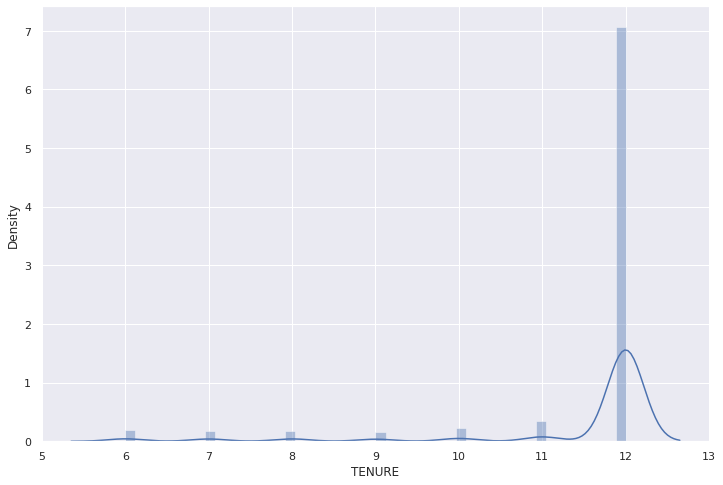

In [86]:

for coluna in df_tratado.columns:
    plt.figure(figsize=(12,8))
    sns.distplot(df_tratado[coluna])
    plt.show()

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


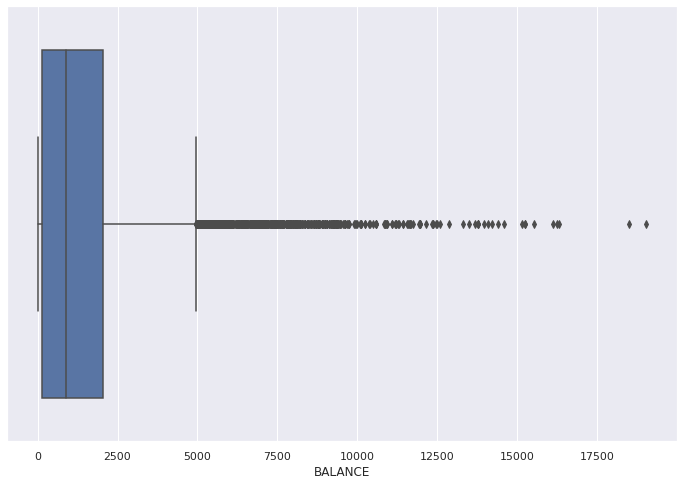

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


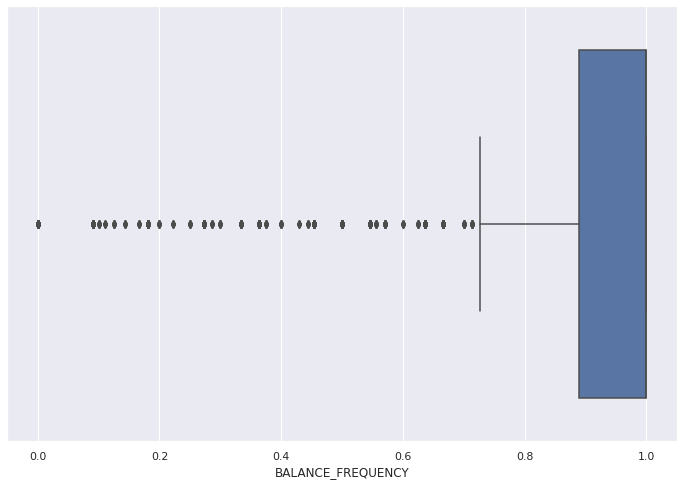

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


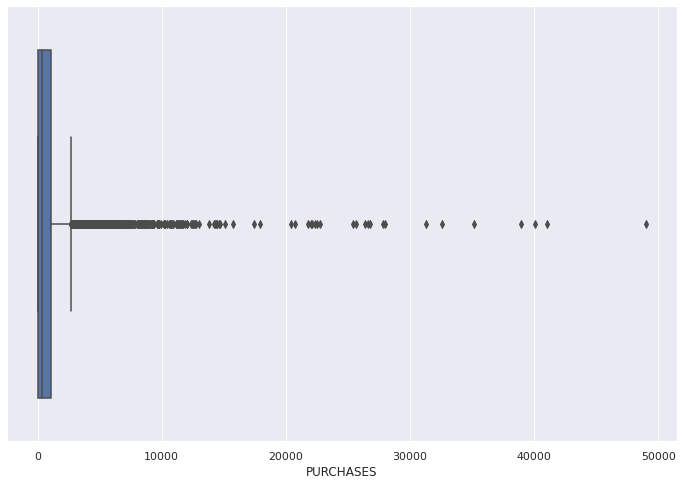

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


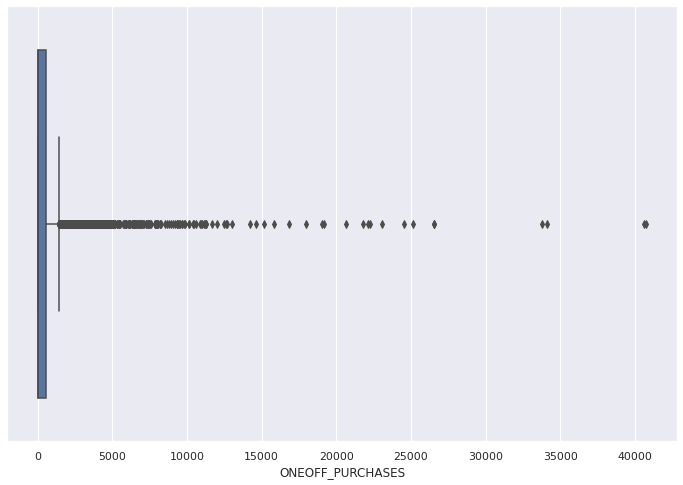

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


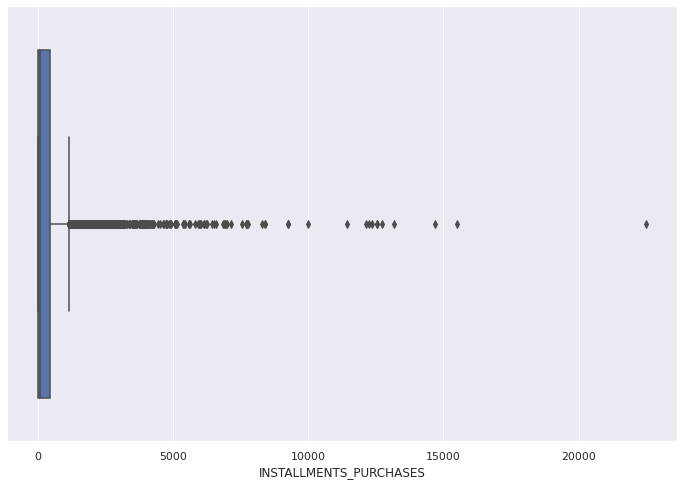

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


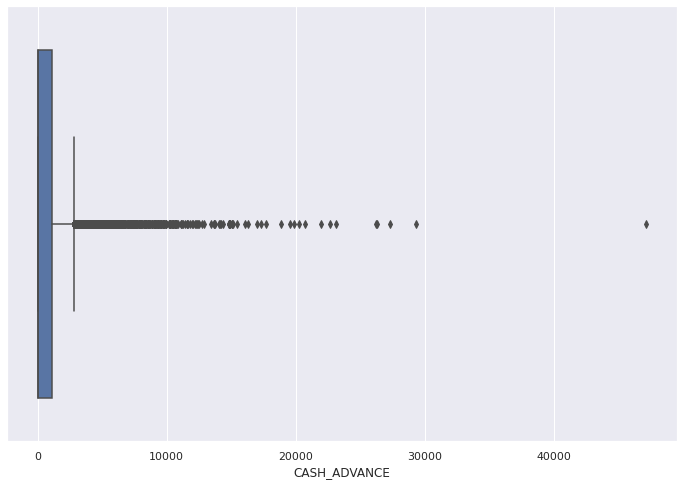

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


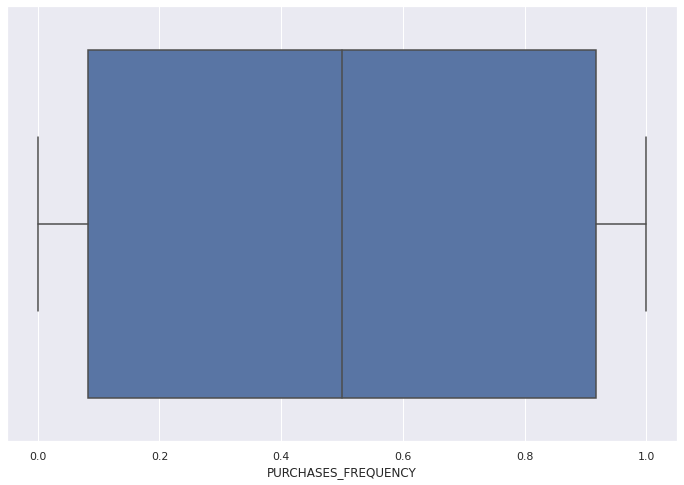

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


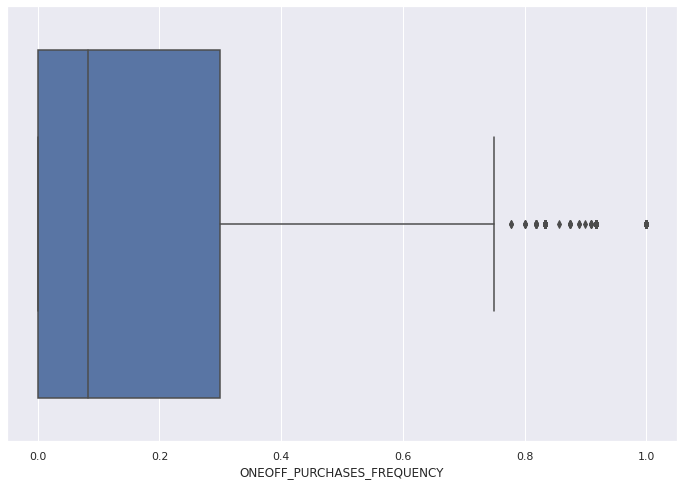

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


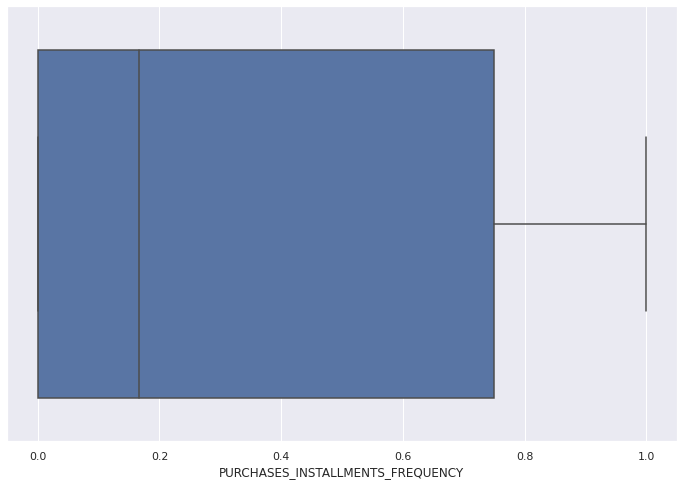

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


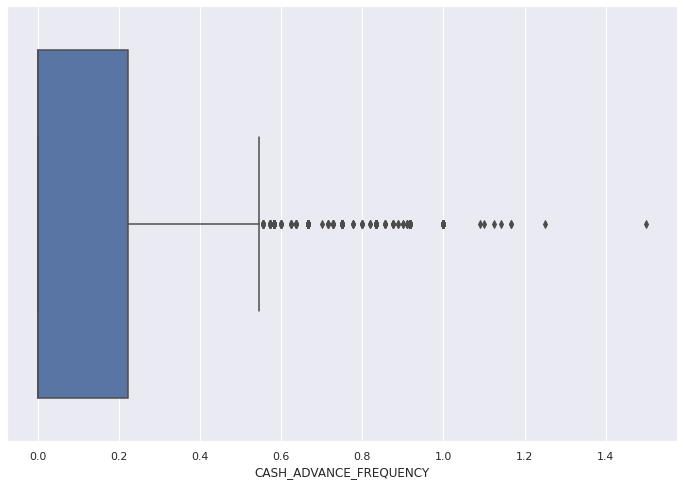

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


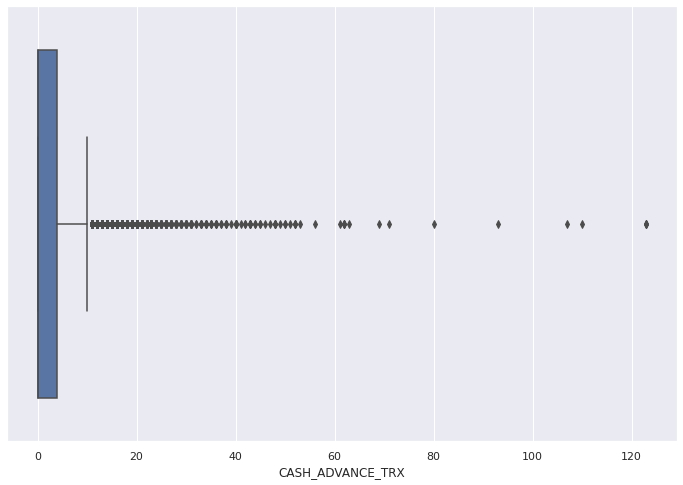

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


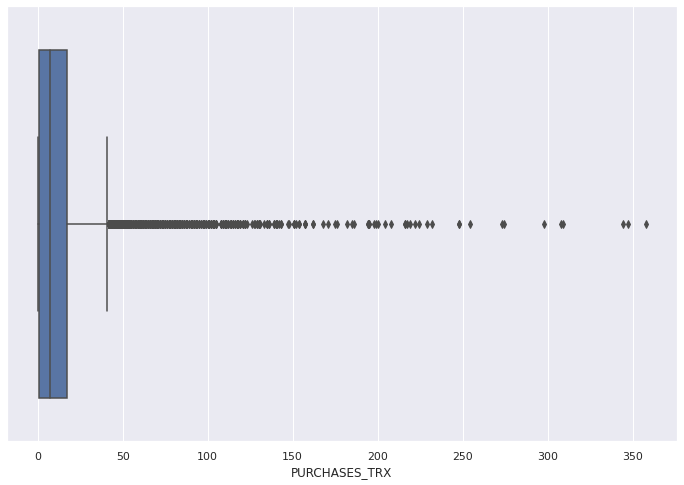

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


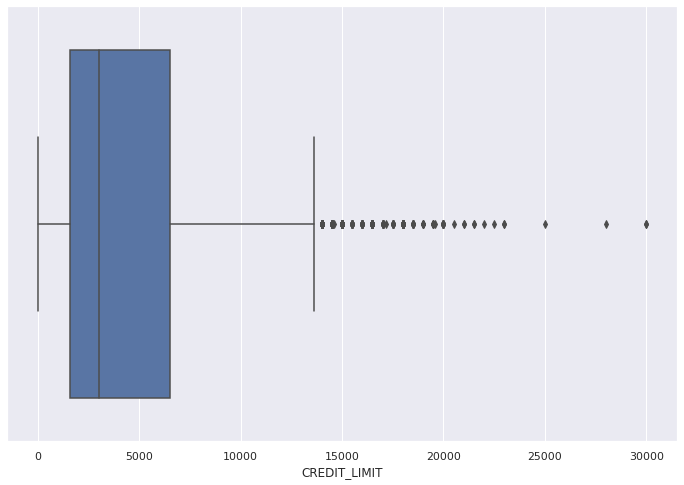

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


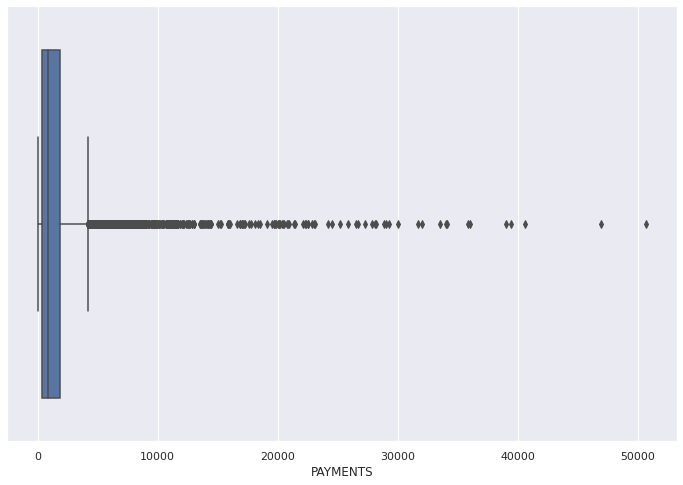

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


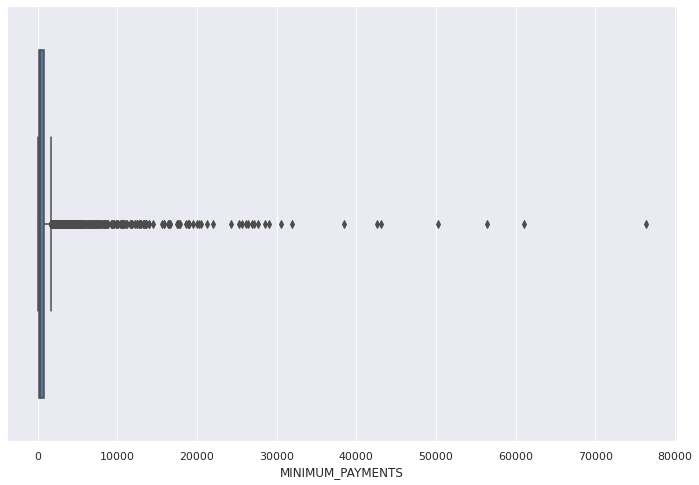

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


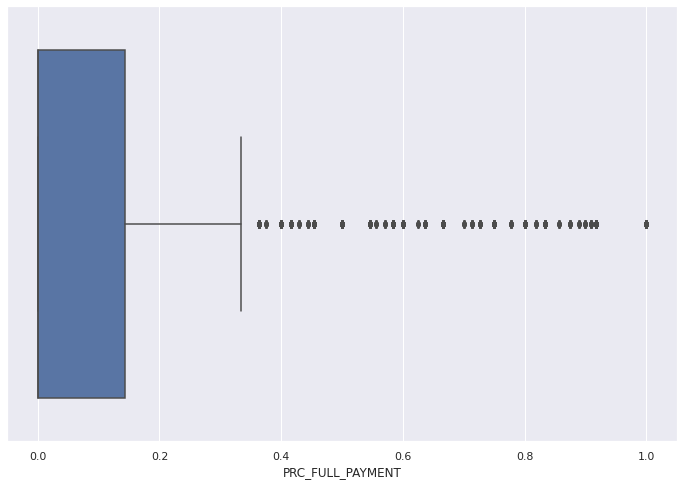

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


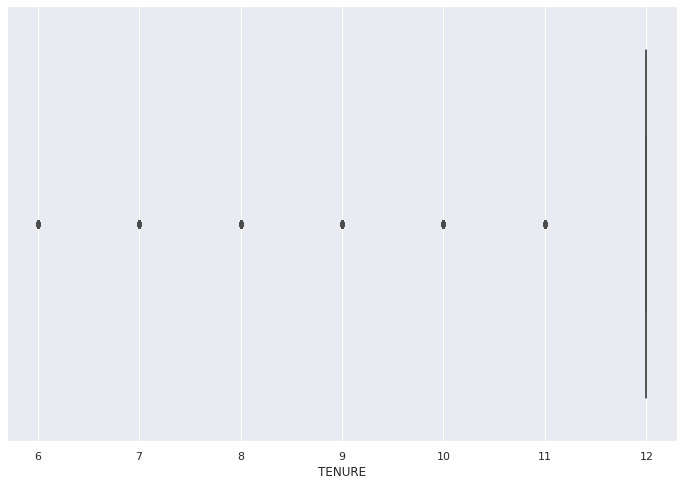

In [87]:
for coluna in df_tratado.columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(df_tratado[coluna])
    plt.show()

<AxesSubplot:>

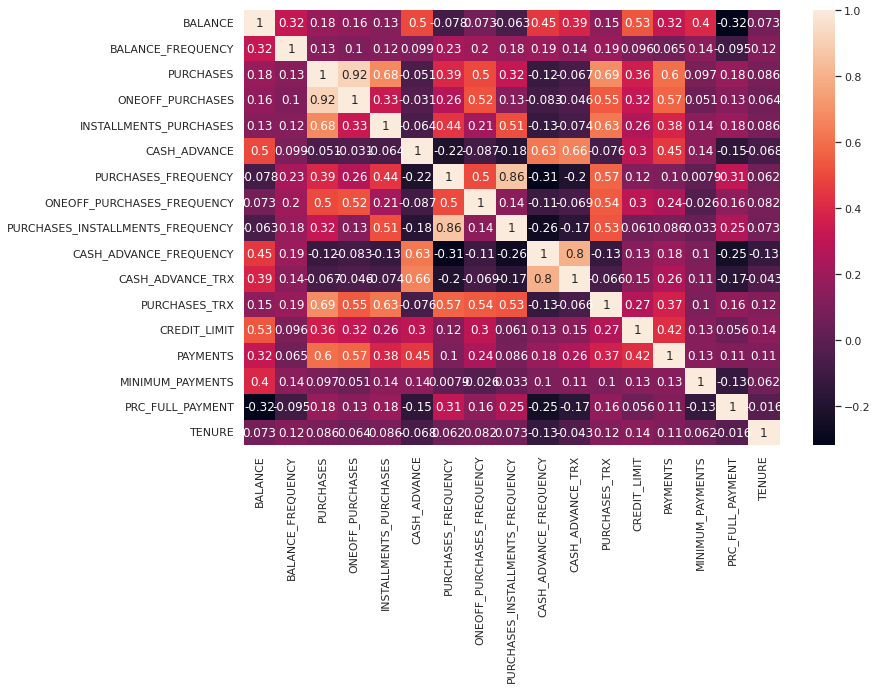

In [88]:
# Heatmap


plt.figure(figsize=(12,8))
sns.heatmap(df_tratado.corr(), annot=True)

In [89]:
# vamos remover os outliers
df_tratado = df_tratado[df_tratado['BALANCE'] < 8000]
df_tratado = df_tratado[df_tratado['PURCHASES'] < 10000]
df_tratado = df_tratado[df_tratado['CASH_ADVANCE'] < 5000]
df_tratado = df_tratado[df_tratado['CREDIT_LIMIT'] < 18000]
df_tratado = df_tratado[df_tratado['PAYMENTS'] < 10000]
df_tratado = df_tratado[df_tratado['MINIMUM_PAYMENTS'] < 5000]
df_tratado = df_tratado[df_tratado['PRC_FULL_PAYMENT'] < df_tratado['PRC_FULL_PAYMENT'].quantile(0.99)]



In [90]:
df_tratado.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000
mean,1304.785620,0.878296,814.018330,468.567490,345.783226,651.377633,0.481987,0.193473,0.356987,0.123548,2.662913,13.178641,4001.411036,1273.798154,551.148694,0.107957,11.529320
std,1538.981638,0.237377,1256.385932,943.958433,630.340712,1088.995575,0.399230,0.286974,0.395049,0.183351,5.002410,20.226659,3060.197690,1458.444740,688.684917,0.219986,1.318347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,131.760301,0.888889,36.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,353.570259,161.497921,0.000000,12.000000
50%,833.629240,1.000000,339.820000,37.000000,77.910000,0.000000,0.454545,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,757.537513,279.000158,0.000000,12.000000
75%,1812.542545,1.000000,1029.940000,525.170000,433.350000,948.380744,0.916667,0.250000,0.750000,0.166667,3.000000,16.000000,6000.000000,1607.021526,681.475934,0.090909,12.000000
max,7994.331680,1.000000,9934.930000,9661.370000,7571.400000,4968.817936,1.000000,1.000000,1.000000,1.500000,71.000000,273.000000,17500.000000,9933.622610,4974.373221,0.916667,12.000000


/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


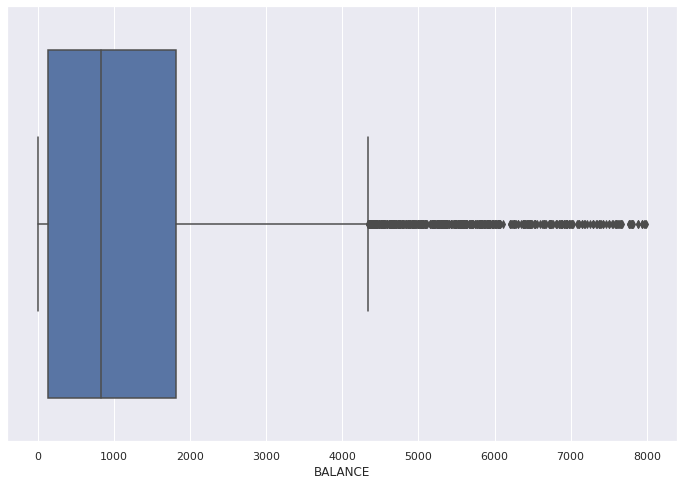

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


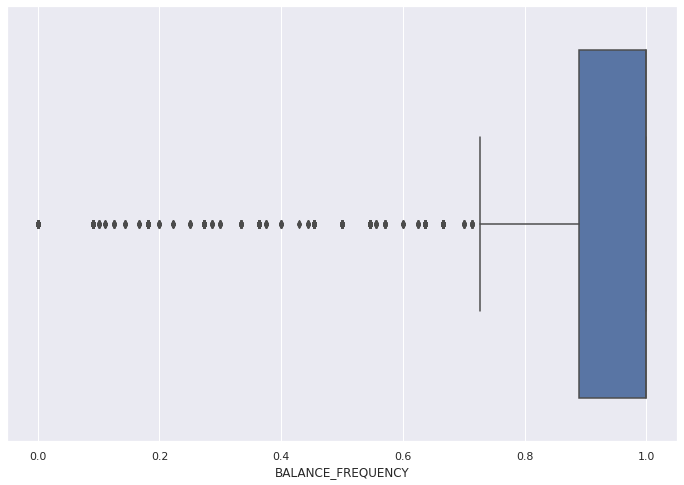

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


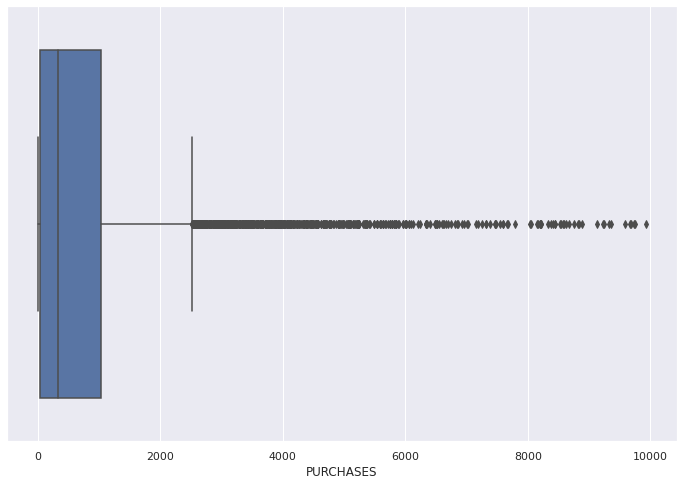

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


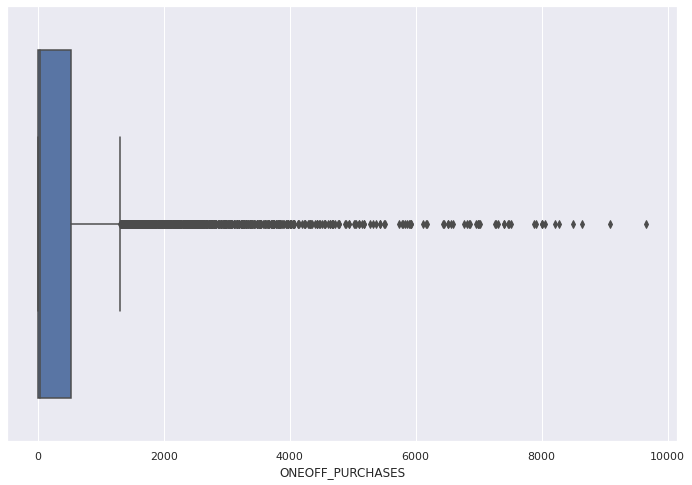

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


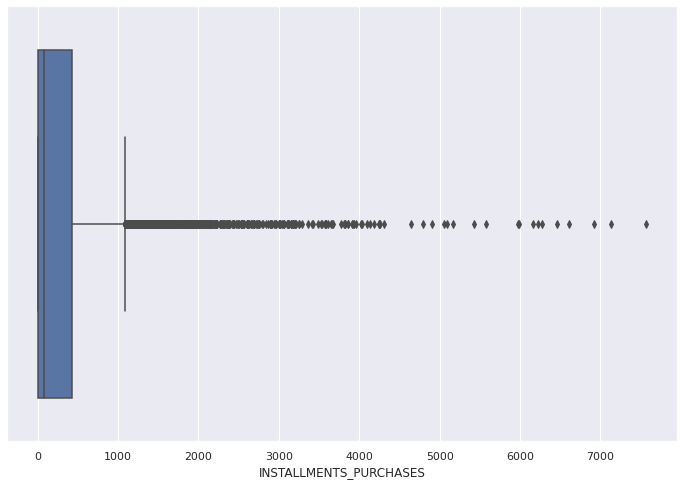

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


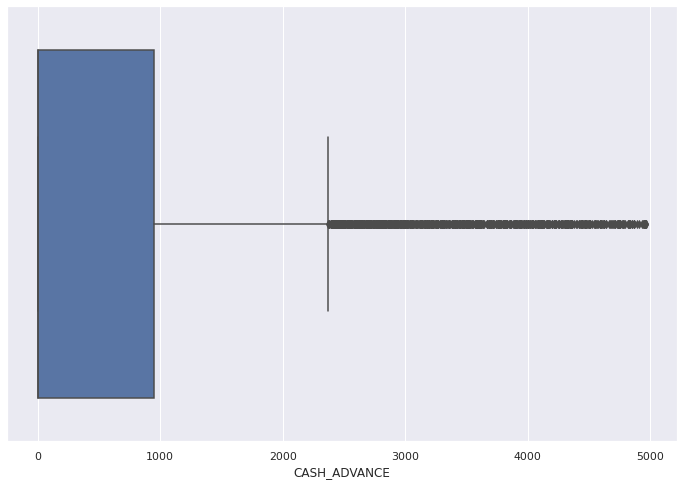

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


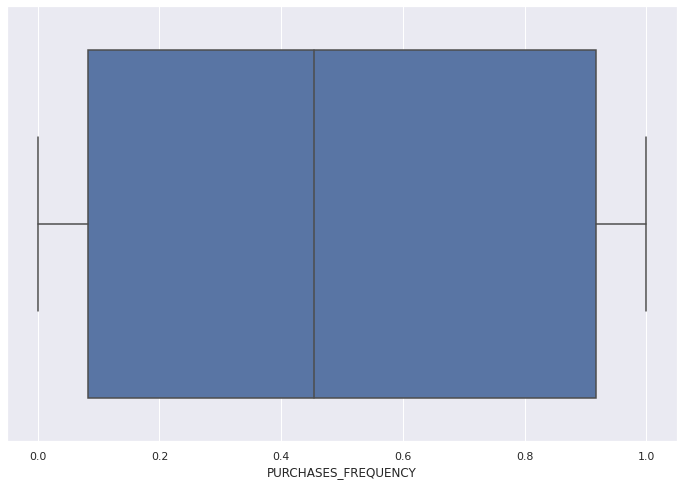

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


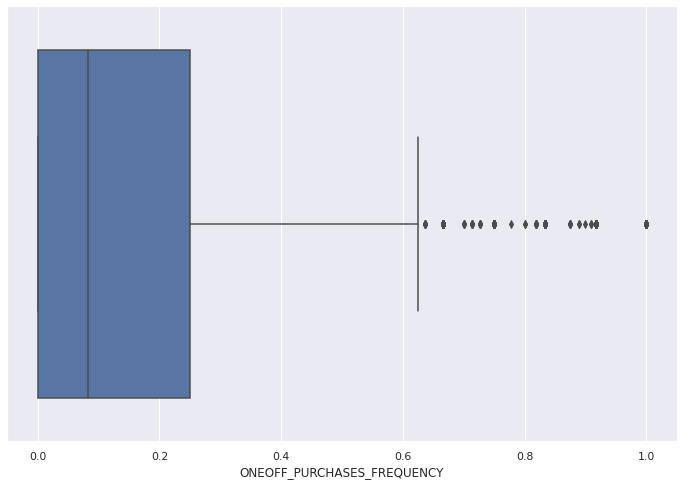

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


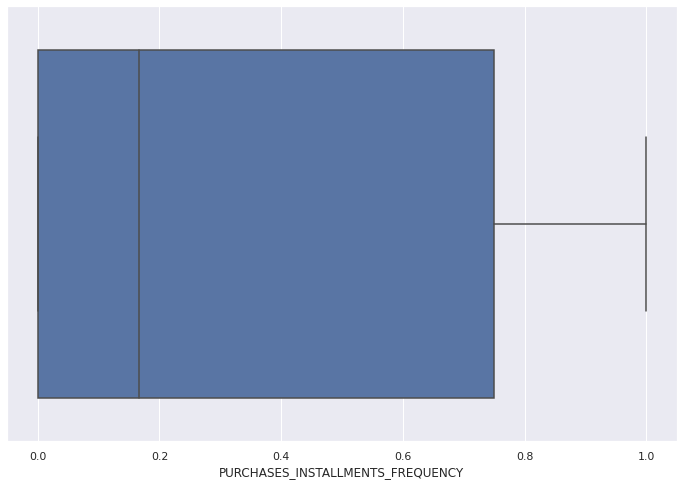

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


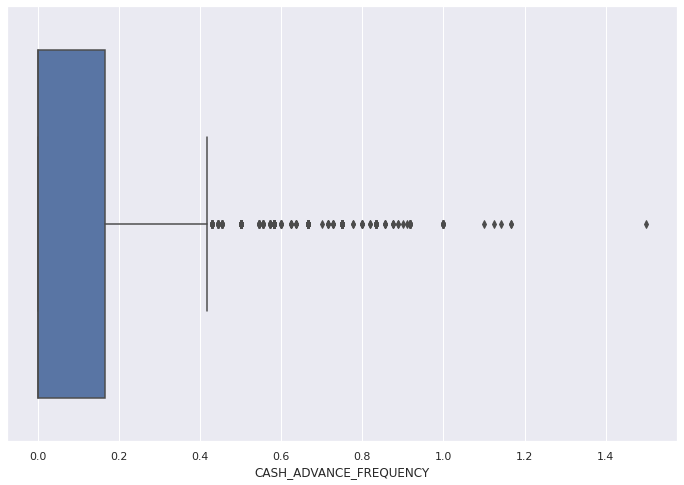

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


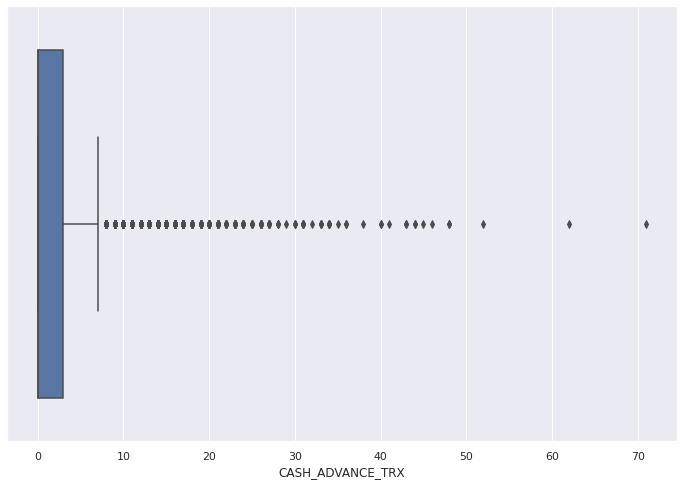

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


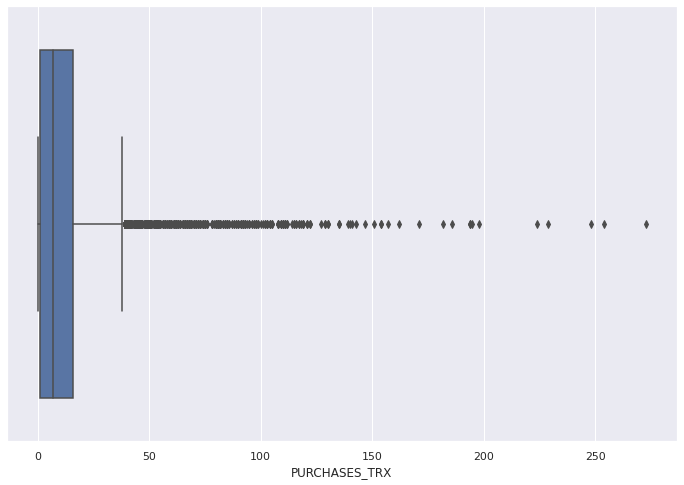

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


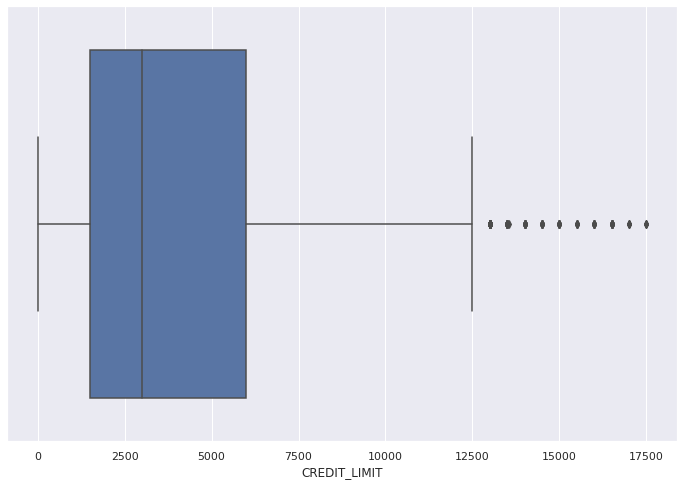

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


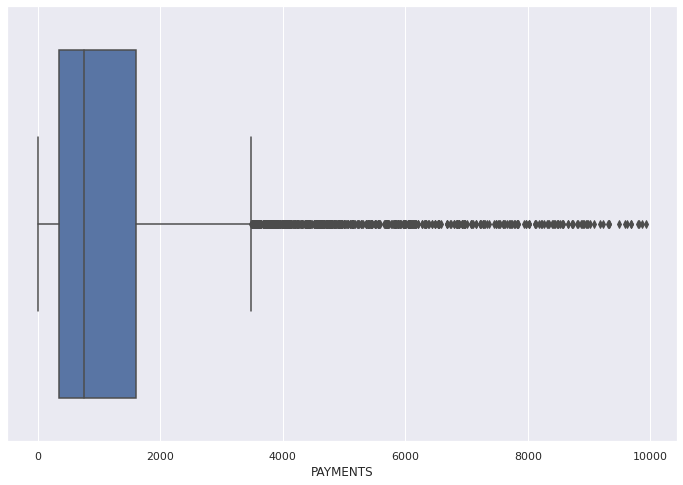

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


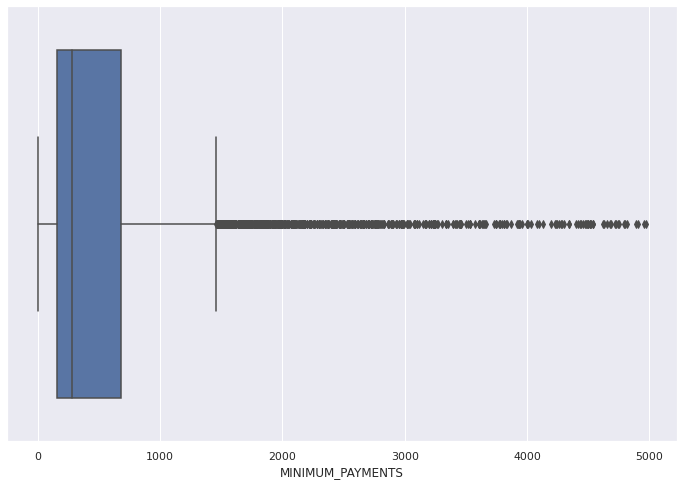

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


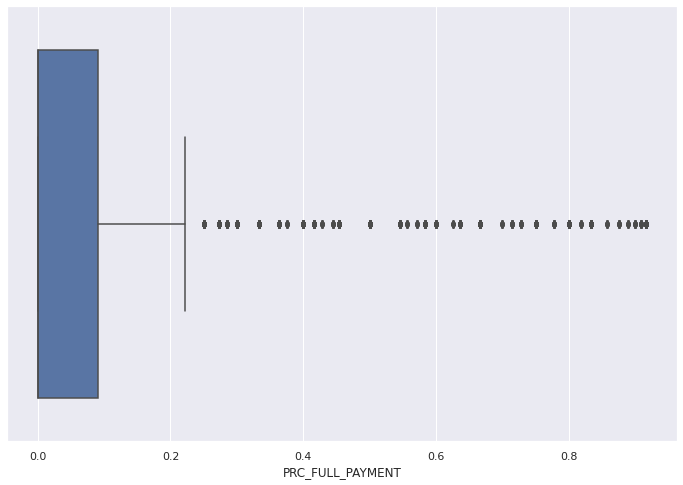

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


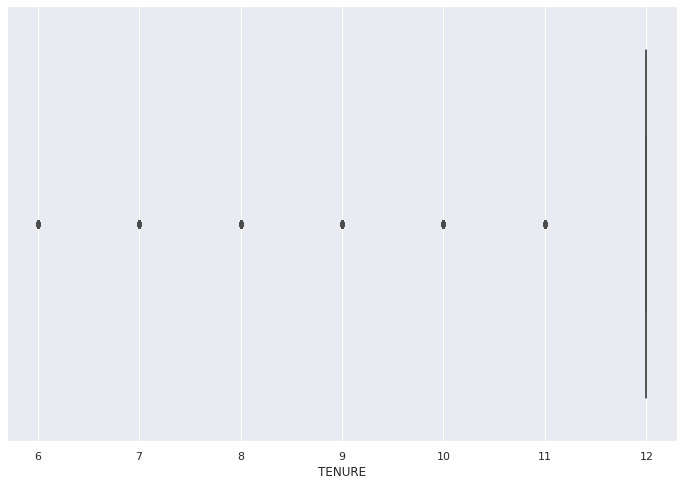

In [91]:
for coluna in df_tratado.columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(df_tratado[coluna])
    plt.show()

In [92]:
# Fazer uma transformação para standarizar os dados (StandardScaler)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_tratado)

df_scaled = pd.DataFrame(df_scaled, columns=df_tratado.columns)

In [93]:
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.821301,-0.253259,-0.572010,-0.496418,-0.397245,-0.598184,-0.789872,-0.674226,-0.692755,-0.673879,-0.532360,-0.552704,-0.980853,-0.735074,-0.597756,-0.490778,0.357046
1,0.773525,0.512736,-0.032515,0.322707,-0.548601,-0.598184,1.297615,2.810636,-0.903713,-0.673879,-0.532360,-0.058275,1.143330,-0.446896,0.110560,-0.490778,0.357046
2,0.235161,-1.019254,0.545235,1.091679,-0.548601,-0.409201,-0.998622,-0.383822,-0.903713,-0.219349,-0.332444,-0.602147,1.143330,-0.873451,-0.800343,-0.490778,0.357046
3,-0.316510,0.512736,-0.635211,-0.479467,-0.548601,-0.598184,-0.998622,-0.383822,-0.903713,-0.673879,-0.532360,-0.602147,-0.915494,-0.408313,-0.444873,-0.490778,0.357046
4,0.328188,0.512736,0.413325,-0.496418,1.566709,-0.598184,0.462620,-0.674226,0.572994,-0.673879,-0.532360,-0.256047,-0.719415,0.086577,2.695307,-0.490778,0.357046


In [94]:
df_scaled.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,7.725000e+03,7.725000e+03,7.725000e+03,7.725000e+03,7.725000e+03,7.725000e+03,7.725000e+03,7.725000e+03,7.725000e+03,7.725000e+03,7.725000e+03,7.725000e+03,7.725000e+03,7.725000e+03,7.725000e+03,7.725000e+03,7.725000e+03
mean,6.744120e-16,8.222693e-16,-1.424768e-15,2.695420e-15,-1.203036e-15,1.087099e-15,-4.644181e-16,-2.805178e-15,1.975234e-15,1.024998e-16,7.005184e-16,1.304774e-15,2.681609e-15,-1.033621e-16,3.315004e-16,-1.338304e-15,-1.606240e-14
std,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00
min,-8.478789e-01,-3.700239e+00,-6.479466e-01,-4.964179e-01,-5.486011e-01,-5.981841e-01,-1.207370e+00,-6.742260e-01,-9.037126e-01,-6.738786e-01,-5.323604e-01,-6.515902e-01,-1.307651e+00,-8.734514e-01,-8.003433e-01,-4.907779e-01,-4.194403e+00
25%,-7.622581e-01,4.462783e-02,-6.192912e-01,-4.964179e-01,-5.486011e-01,-5.981841e-01,-9.986224e-01,-6.742260e-01,-9.037126e-01,-6.738786e-01,-5.323604e-01,-6.021473e-01,-8.174547e-01,-6.310061e-01,-5.658262e-01,-4.907779e-01,3.570457e-01
50%,-3.061680e-01,5.127357e-01,-3.774549e-01,-4.572187e-01,-4.249933e-01,-5.981841e-01,-6.874197e-02,-3.838220e-01,-4.817954e-01,-6.738786e-01,-5.323604e-01,-3.054899e-01,-3.272585e-01,-3.540032e-01,-3.951969e-01,-4.907779e-01,3.570457e-01
75%,3.299518e-01,5.127357e-01,1.718705e-01,5.996681e-02,1.389287e-01,2.727489e-01,1.088867e+00,1.969894e-01,9.949108e-01,2.351862e-01,6.738935e-02,1.394962e-01,6.531337e-01,2.284934e-01,1.892530e-01,-7.750155e-02,3.570457e-01
max,4.347017e+00,5.127357e-01,7.260112e+00,9.739197e+00,1.146378e+01,3.964864e+00,1.297615e+00,2.810636e+00,1.627785e+00,7.507688e+00,1.366172e+01,1.284632e+01,4.411304e+00,5.938096e+00,6.423127e+00,3.676431e+00,3.570457e-01


In [96]:
# Fazer o KMEANS e utilizar o método do cotovelo para definir o número de clusters
# Vamos testar de 1 até 20 clusters
# Vamos armazenar o valor de WCSS para cada valor de K
# Vamos plotar um gráfico de linha para visualizar o valor de WCSS para cada K
# Vamos plotar um gráfico de linha para visualizar o valor de WCSS para cada K
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='random')
    kmeans.fit(df_scaled)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)



Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fa60ba31b80>
Traceback (most recent call last):
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modul

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fa645b90ca0>
Traceback (most recent call last):
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modul

1 131325.00000000052
2 107212.37147398891
3 91040.38311493628
4 81106.4903678464
5 75460.40880208516
6 70447.39657554781
7 65892.31916750819
8 62736.92252358291
9 59714.88440168825


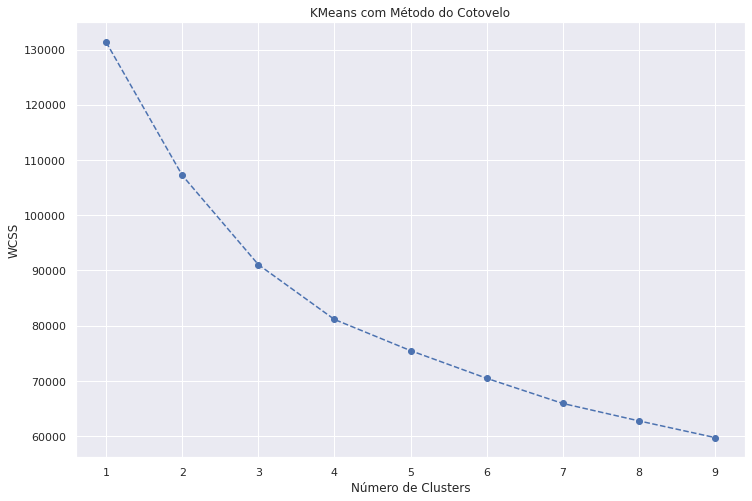

In [97]:
plt.figure(figsize=(12,8))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.title('KMeans com Método do Cotovelo')
plt.show()

In [ ]:
# Através de boxplots, entender quais os perfis dos clusters e tentar caracterizar os clusters
# Vamos utilizar o K=5
kmeans = KMeans(n_clusters=5, init='random')
kmeans.fit(df_scaled)

df_tratado['KClasses'] = kmeans.labels_

df_tratado.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KClasses
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,3
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.0,12,4
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.0,12,3
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12,3
C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.0,12,4


In [ ]:
for coluna in df_tratado.columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(x='KClasses', y=coluna, data=df_tratado)
    plt.show()

In [101]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2).fit_transform(df_tratado)
pca

array([[-3559.29638249,  -221.06909567],
       [ 3317.90630767, -1317.5231277 ],
       [ 3166.10776816,  -813.05237222],
       ...,
       [-3581.95575148,  -245.69016527],
       [-4078.07655589,  -257.25825821],
       [-3019.89465112,   607.85111677]])

In [102]:
# Determinando um range de um Hyperparametro de K do Kmeans
# Vamos testar de 1 até 10 clusters
k_range = range(1, 10)

# Aplicando o modelo de Kmeans para cada valor de K
k_means_var = [KMeans(n_clusters=k).fit(pca) for k in k_range]


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fa61496a4c0>
Traceback (most recent call last):
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modul

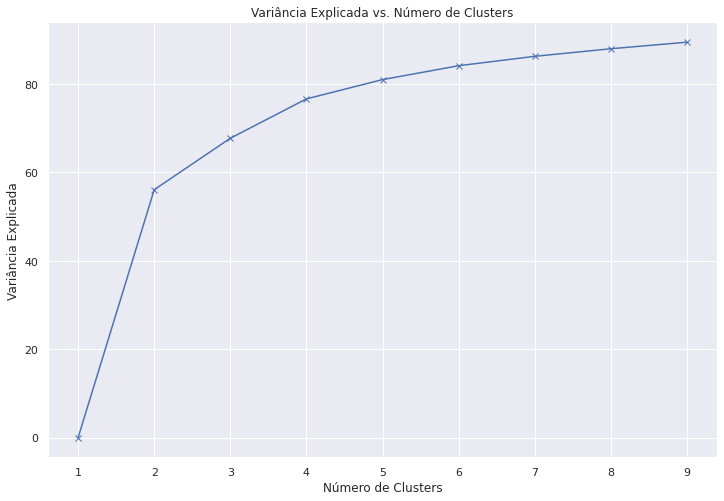

In [103]:
# Ajustando o centroide de cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]
# Calculando a distância euclidiana para cada ponto. Importar cdist do scipy
from scipy.spatial.distance import cdist
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_euclid]
# Soma dos quadrados da distância dentro do cluster
doma_quadrado_intra_cluster = [sum(d**2) for d in dist]
# Soma total dos quadrados importar pdist do scipy
from scipy.spatial.distance import pdist
soma_total_quadrados = sum(pdist(pca)**2)/pca.shape[0]
# Soma dos quadrados da distância entre clusters
doma_quadrado_inter_cluster = soma_total_quadrados - doma_quadrado_intra_cluster
# Variância explicada
var_explicada = doma_quadrado_inter_cluster/soma_total_quadrados*100
# Gráfico da variância explicada
plt.figure(figsize=(12,8))
plt.plot(k_range, var_explicada, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Variância Explicada')
plt.title('Variância Explicada vs. Número de Clusters')
plt.show()

In [131]:
# criando modelo com k = 7
modelo_v1 = KMeans(n_clusters=4, init='random')
modelo_v1.fit(pca)

KMeans(init='random', n_clusters=4)

In [132]:
# silhouette_score
from sklearn.metrics import silhouette_score
silhouette_score(pca, modelo_v1.labels_, metric='euclidean')

0.5027337727438915

In [134]:
#Incluindo o cluster no dataset original
df_tratado['KClasses'] = modelo_v1.labels_

In [135]:
df_tratado.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KClasses
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,2
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.0,12,3
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.0,12,3
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12,2
C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.0,12,2
